In [ ]:
!pip install gensim scikit-learn matplotlib
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('punkt_tab') # Added to download the missing resource

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Sample corpus
corpus = [
    "Natural language processing is a fascinating field",
    "Word embeddings capture semantic meanings",
    "NLP is used in chatbots and virtual assistants",
    "Word2Vec is a powerful tool for creating word embeddings"
]

In [ ]:
# Tokenize sentences
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]
print(tokenized_corpus)

[['natural', 'language', 'processing', 'is', 'a', 'fascinating', 'field'], ['word', 'embeddings', 'capture', 'semantic', 'meanings'], ['nlp', 'is', 'used', 'in', 'chatbots', 'and', 'virtual', 'assistants'], ['word2vec', 'is', 'a', 'powerful', 'tool', 'for', 'creating', 'word', 'embeddings']]


In [ ]:
 #Train Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
# Save the model
model.save("word2vec.model")
model = Word2Vec.load("word2vec.model")

In [ ]:
# Get vectors for a subset of words
words = list(model.wv.index_to_key)[:10]  # Select the first 10 words
print(words)
word_vectors = [model.wv[word] for word in words]
print(word_vectors)

['is', 'embeddings', 'word', 'a', 'creating', 'for', 'tool', 'powerful', 'word2vec', 'assistants']
[array([-5.3482049e-04,  2.3825991e-04,  5.1056668e-03,  9.0133334e-03,
       -9.3041826e-03, -7.1184216e-03,  6.4591165e-03,  8.9739896e-03,
       -5.0175558e-03, -3.7653942e-03,  7.3820921e-03, -1.5338163e-03,
       -4.5345500e-03,  6.5530594e-03, -4.8587834e-03, -1.8163866e-03,
        2.8779216e-03,  9.9028728e-04, -8.2870843e-03, -9.4514126e-03,
        7.3109688e-03,  5.0709019e-03,  6.7580235e-03,  7.6032913e-04,
        6.3481932e-03, -3.4047901e-03, -9.4892143e-04,  5.7721287e-03,
       -7.5215534e-03, -3.9352756e-03, -7.5127776e-03, -9.3112560e-04,
        9.5384931e-03, -7.3194429e-03, -2.3347498e-03, -1.9366210e-03,
        8.0779372e-03, -5.9318673e-03,  4.1685435e-05, -4.7525410e-03,
       -9.6020838e-03,  5.0074058e-03, -8.7600304e-03, -4.3903729e-03,
       -3.4098470e-05, -2.9744051e-04, -7.6616611e-03,  9.6138855e-03,
        4.9824370e-03,  9.2338668e-03, -8.158274

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

import matplotlib.pyplot as plt

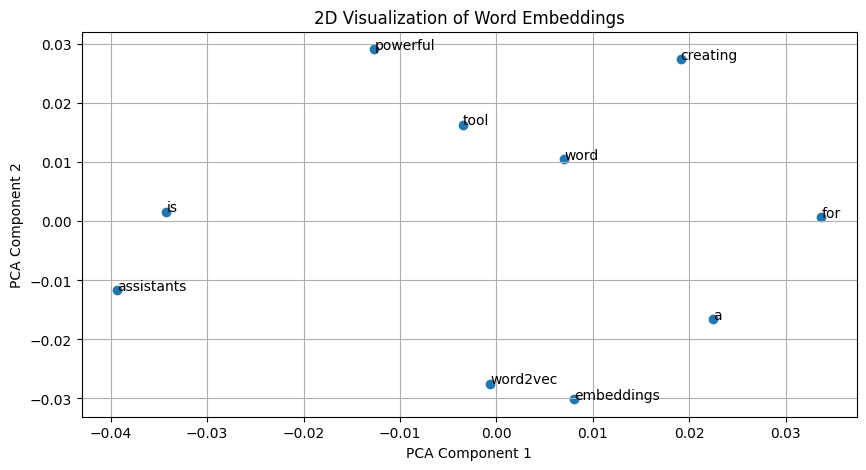

In [ ]:
# Plot the words in 2D space
plt.figure(figsize=(10, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

# Annotate the points with the words
for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]))

plt.title("2D Visualization of Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

Word2Vec learns meaning from:

Word co-occurrence statistics (which words appear near which words)

corpus has:

Only 7 sentences

Most words appear only once

Almost no repetition

So:

⚠️ The embeddings will be mostly random and meaningless

🟢 2️⃣ What the model will still do

Even with bad data, Word2Vec will:

Assign a 100D vector to each word

Try to place words that appear in same sentence somewhat closer

PCA will force them into 2D and show a plot

But:

The plot is NOT semantic, only showing training noise + weak co-occurrence

What you will likely observe in the plot

You may see:

"hugging", "face", "langchain", "langflow", "transformers"
→ slightly closer (same sentence)

"word", "embeddings", "word2vec"
→ clustered

"vectorDB", "databricks", "llms"
→ floating somewhere unrelated

But:

⚠️ Distances and clusters are NOT reliable

🧠 4️⃣ Why semantics are NOT learned here

Word2Vec needs:

Thousands of sentences

Repeated usage patterns like:

LLM uses embeddings
VectorDB stores embeddings
Word2Vec creates embeddings


Your corpus has:

No repetition

No context overlap

No learning signal

So:

The model cannot infer meaning

When the corpus is changed to technical keywords, Word2Vec still generates vectors, but the embeddings do not capture true semantic relationships because the dataset is extremely small.

The 2D PCA visualization shows weak or random clustering.

Words appearing in the same sentence show slight proximity.

Proper semantic structure requires large corpora with repeated contextual usage.

#Small corpus = garbage embeddings

#Big corpus = meaningful geometry

In [ ]:
corpus1 = [
    # Embeddings & vectors
    "word embeddings represent meaning of words in vector space",
    "word2vec is a method to generate word embeddings",
    "glove and fasttext are also embedding methods",
    "embeddings are stored in vector database",
    "vector database stores embedding vectors efficiently",
    "embeddings help measure semantic similarity between words",
    "cosine similarity is used to compare embedding vectors",

    # NLP & preprocessing
    "natural language processing uses tokens and embeddings",
    "nlp includes tokenization stemming and lemmatization",
    "text preprocessing is important in nlp pipelines",
    "nlp models use word embeddings as input features",
    "language models learn patterns from text data",

    # Transformers & LLMs
    "transformers are powerful models for natural language processing",
    "bert gpt and t5 are transformer based models",
    "large language models are built using transformers",
    "llms use attention mechanism",
    "attention helps the model focus on important words",
    "hugging face provides transformer models and tools",

    # RAG & retrieval
    "vector database is used in retrieval augmented generation",
    "rag uses vector database to retrieve relevant documents",
    "retrieval uses embedding similarity search",
    "llms use retrieved context to generate answers",

    # Tools & frameworks
    "langchain is used to build llm applications",
    "langchain connects llms with vector databases",
    "faiss and chroma are popular vector databases",
    "pytorch and tensorflow are deep learning frameworks",
    "fastapi is used to deploy machine learning models",

    # Multimodal
    "multimodal models process text image and audio",
    "multimodal llms can understand images and text",
    "clip is a multimodal model for text and images",

    # Training & data
    "machine learning models require training data",
    "deep learning models require large datasets",
    "transformers are trained on huge text corpora",
    "good data improves model performance",
]


In [ ]:
tokenized_corpus1 = [word_tokenize(sentence.lower()) for sentence in corpus1]
print(tokenized_corpus1)

[['word', 'embeddings', 'represent', 'meaning', 'of', 'words', 'in', 'vector', 'space'], ['word2vec', 'is', 'a', 'method', 'to', 'generate', 'word', 'embeddings'], ['glove', 'and', 'fasttext', 'are', 'also', 'embedding', 'methods'], ['embeddings', 'are', 'stored', 'in', 'vector', 'database'], ['vector', 'database', 'stores', 'embedding', 'vectors', 'efficiently'], ['embeddings', 'help', 'measure', 'semantic', 'similarity', 'between', 'words'], ['cosine', 'similarity', 'is', 'used', 'to', 'compare', 'embedding', 'vectors'], ['natural', 'language', 'processing', 'uses', 'tokens', 'and', 'embeddings'], ['nlp', 'includes', 'tokenization', 'stemming', 'and', 'lemmatization'], ['text', 'preprocessing', 'is', 'important', 'in', 'nlp', 'pipelines'], ['nlp', 'models', 'use', 'word', 'embeddings', 'as', 'input', 'features'], ['language', 'models', 'learn', 'patterns', 'from', 'text', 'data'], ['transformers', 'are', 'powerful', 'models', 'for', 'natural', 'language', 'processing'], ['bert', 'gpt

In [ ]:
 #Train Word2Vec model
model = Word2Vec(sentences=tokenized_corpus1, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
# Save the model
model.save("word2vec.model")
model = Word2Vec.load("word2vec.model")

In [ ]:
# Get vectors for a subset of words
words = list(model.wv.index_to_key)[:10]  # Select the first 10 words
print(words)
word_vectors = [model.wv[word] for word in words]
print(word_vectors)

['models', 'and', 'are', 'is', 'vector', 'text', 'to', 'embeddings', 'learning', 'llms']
[array([-5.4016127e-04,  3.1854195e-04,  5.1370058e-03,  9.0373186e-03,
       -9.2511810e-03, -7.1879914e-03,  6.4984118e-03,  9.1222236e-03,
       -5.0556227e-03, -3.8106521e-03,  7.3519088e-03, -1.6164340e-03,
       -4.5056720e-03,  6.6544428e-03, -4.8232377e-03, -1.8464903e-03,
        2.8520676e-03,  9.8128186e-04, -8.2519045e-03, -9.5582278e-03,
        7.3431842e-03,  5.0890851e-03,  6.7552864e-03,  7.2179706e-04,
        6.3619488e-03, -3.3695248e-03, -9.7849593e-04,  5.7533011e-03,
       -7.5625773e-03, -3.9506298e-03, -7.4335332e-03, -9.3406811e-04,
        9.5485495e-03, -7.3344111e-03, -2.3555020e-03, -1.7691886e-03,
        8.1793768e-03, -5.9466222e-03,  2.4589717e-05, -4.8190849e-03,
       -9.5320335e-03,  4.9549611e-03, -8.8020656e-03, -4.3651545e-03,
        1.0267077e-06, -2.9458903e-04, -7.7627595e-03,  9.5438035e-03,
        5.0453683e-03,  9.1831926e-03, -8.0920244e-03,  4.

In [ ]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

import matplotlib.pyplot as plt

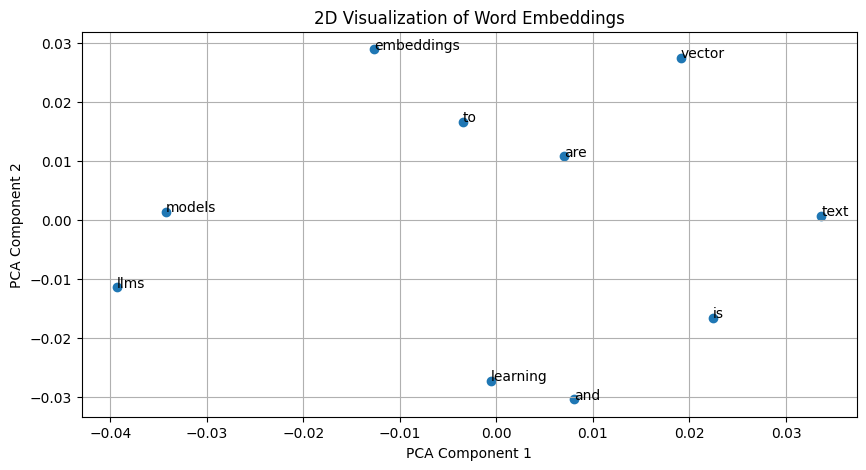

In [ ]:
# Plot the words in 2D space
plt.figure(figsize=(10, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

# Annotate the points with the words
for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]))

plt.title("2D Visualization of Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

Each dot = one word

Distance between dots ≈ how similar the words are (in Word2Vec’s learned space)

PCA just compresses 100D vectors into 2D so we can see them

Why and, is, to, are look messy?

These are called:

🔴 Stop words (grammar glue words)

They:

Appear in every sentence

Do NOT carry topic meaning

So Word2Vec can’t place them in a meaningful semantic cluster

That’s why:

They float around without clear structure.

This is STILL a small corpus

Even though this is better than before:

The geometry is still weak

Distances are not very reliable

PCA also distorts real relationships

So:

This plot is for demonstration, not scientific conclusions.